# Introduction
This notebook runs through about the first four lectures of a deep learning course. We will cover the basics of neural networks and a number of techniques used to train and test neural networks.

# Deep Learning
Deep learning is a subset of machine learning which utilizes neural networks that are able to learn from data without supervision.

It may be helpful to compare deep learning to shallow learning. Shallow learning can be thought of as the learning of the direct relationship between two events. For example, training a dog to sit when you say sit is shallow learning. In contrast, deep learning is more like learning a trend or behavior and making a decision by itself. For example, learning the alphabet by watching letters is deep learning.

Two important characteristics of deep learning is remembering (temporal deep learning) and learning from watching (spatial deep learning).

[[1]](#1)

# Neural Network
A neural network is composed of layers of interconnected neurons.


## Simple Example
Here is a simple example of a neural network:
<div>
<img src="https://www.researchgate.net/publication/364332451/figure/fig2/AS:11431281089928283@1665793221042/A-single-layer-perceptron-with-two-inputs.jpg" width="300"/>
</div>

It has two inputs, one output, two weights, and one bias. The green neuron, $\Sigma$, is given by the sum of $w_1x_1,w_2x_2,b$. The yellow neuron, $\gamma$, is the output of some function, $f$, applied on the sum.

## Layer Types
Layers are classified as input, hidden, or output. Input layers are those which have no proceeding layers and output layers are those which have no succeeding layers. Hidden layers are those which have both a proceeding and succeeding layer.


## Neurons
The neurons of the input layer correspond to the features that are fed to the network and the neurons of the output layer corresponding to the variables to be predicted by the input features. Each hidden layer performs a nonlinear transformation on the neurons of the layer before it. The number of hidden layers and neurons per layer increases the complexity of the network.

The neurons of each layer, with the exception of the input layer, is computed by taking the weighted sum of all previous neurons and respective weights, then adding its corresponding bias. This preactivation is fed into a nonlinear activation function, which gives the final activation of the neuron.


## More Complex Example
<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231107165249/linear.png" width="500"/>
</div>

In the feedforward network above, we can infer that two input features are being used to predict one target variable (perhaps we are predicting if something is true or false).


### Manual Forward Propagation
If $\mathbf{a}_1$ is the activation of the top neuron in the hidden layer and $\mathbf{a}_2$ is the activation of the bottom neuron, then $\mathbf{a}_1=h(W_{11}x_1+W_{21}x_2+\mathbf{b}_{11}),\;\mathbf{a}_2=h(W_{12}x_1+W_{22}x_2+\mathbf{b}_{12})$.

Then, $y$, the output activation, is given by $y=h(V_1\mathbf{a}_1+V_2\mathbf{a}_2+\mathbf{b}_2)$.


### Forward Propagation, Vectorized
The hidden layer activations can be represented in vector form as:
$$
\begin{bmatrix}
    \mathbf{a}_1\\\mathbf{a}_2
\end{bmatrix}=h(
    \begin{bmatrix}
        W_{11}&W_{21}\\W_{12}&W_{22}
    \end{bmatrix}
    \begin{bmatrix}
        x_1\\x_2
    \end{bmatrix}
    +
    \begin{bmatrix}
        \mathbf{b}_{11}\\
        \mathbf{b}_{12}
    \end{bmatrix}
)
$$

Or more simply, $\mathbf{a} = h(Wx+\mathbf{b_1})$.

Similarly, the output activations can be simply given as $h(V\mathbf{a}+\mathbf{b_2})$.


### Summary
Thus, we have:
$$
\mathbf{a} = h(Wx+\mathbf{b_1})\\
y=h(V\mathbf{a}+\mathbf{b_2})=h(Vh(Wx+\mathbf{b_1})+\mathbf{b_2})
$$
where:
- $x$ is the input layer, as a column vector.
- $\mathbf{a}$ are the activations of the hidden layer, as a column vector.
- $y$ is the output.
- $W,V$ are the weight matrices between the input & hidden layer and hidden & output layer, respectively.
- $h$ is some nonlinear activation function, which is applied element-wise to vectors.

This process of passing the inputs through the network to become some prediction is called forward propagation.

For our model to learn, the weights and biases must be estimated.

Take note of the dimensions of our vectors and matrices.

## Network Types
A neural network may either be a feedforward network, where the neurons connect only forwards, or a recurrent network, where the outputs of neurons may be used to determine its output, forming a cycle in the network.

## Hyperparameters
As opposed to the parameters (e.g. the weights and biases), hyperparameters refer to the details of the learning process, such as the architecture of the network, loss function used, activation functions used, etc.

## Notation and Dimensions
- $n_i$ is the number of neurons in the $i$-th layer.
- $m$ is the number of observations.
- $L$ is the number of layers in the network
- $X$ is the input.
  - $n_x\times m$
  - Each column is one observation of $n_0$ input features.
- $x^{(i)}$ is the $i$-th column of $X$.
- $Y$ is the output.
  - $n_y\times m$
  - Each column is one observation of $n_0$ output features.
- $Z_i$ is the column vector of the preactivations of the $i$-th layer.
  - $n_i\times m$
- $A_i$ is the column vector of the activations of the $i$-th layer.
  - $n_i\times m$
  - We set $A_0$ to be $X$.
  - We set $A_{L-1}$ to be $\hat{Y}$.
- $W_i$ is the weights that transform layer $i-1$ into layer $i$.
  - $n_{\text{out}}\times n_{\text{in}}$
  - Each row of the matrix is the weights of the linear transformation corresponding to each output neuron.
- $\mathbf{b}_i$ is the column bias vector that is added to $W_iA_{i-1}$ to produce $Z_i$.
  - $n_i\times 1$ (broadcasted to $n_i\times m$)
- The computation of a layer's activations is given by:
  - $A_i=h(Z_i),\quad Z_i=W_iA_{i-1}+\mathbf{b}_i$

For a more detailed and thorough notation reference, see [[4]](#4)


# Activation Functions
Given some pre-activations at a layer as an input, an activation function is used to compute the activations at that same layer.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_h(x, y, l = -1, r = 1, s = 0.5):
    plt.plot(x, y)

    plt.xticks(np.arange(l, r + s, s))
    plt.yticks(np.arange(-1, 1 + 0.5, 0.5))

    plt.axhline(0, color='gray', alpha=0.3)
    plt.axvline(0, color='gray', alpha=0.3)

    plt.xlabel('x')
    plt.ylabel('h(x)')

    plt.show()


## Nonlinearity
Earlier, it was mentioned that the preactivation of a node is fed into a *nonlinear* activation function. Nonlinearity, in particular, is essential as a deep linear network is equivalent to a linear network without hidden layers or a linear regression ([brief proof](https://stats.stackexchange.com/a/335972/405918)).

## Continuity
Continuity of an activation function is essential for the training of a neural network. Essentially, we intend to iteratively minimize some error function using the derivatives of the activations. We will explore this later, in backpropogation.

## Step Function
The step function is given by:
$$h(x)=\begin{cases}
0 && x \leq 0\\
1 && x > 0
\end{cases}$$

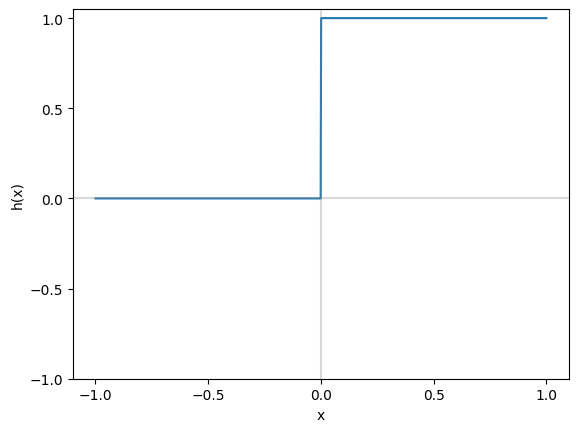

In [ ]:
def step(x):
    return 1 if x > 0 else 0
vstep = np.vectorize(step)

x = np.linspace(-1, 1, 1_000)
y = vstep(x)

plot_h(x, y)

The threshold can be changed from 0 and the magnitudes of the outputs can be changed, as well. Note that the function is discontinuous at $x=0$ and $h^{(n)}(x)=0$ for all $n>1,x\neq0$. These qualities make the step function ineligible as a candidate to be an activation function.

## Sigmoid Function

The sigmoid function is given by:
$$
h(x)=\sigma(x)=\frac{1}{1+e^{-x}}
$$

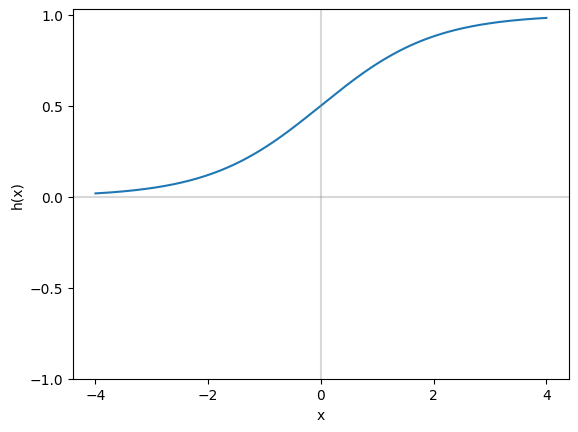

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-4, 4, 1_000)
y = sigmoid(x)

plot_h(x, y, l = -4, r = 4, s = 2)

The sigmoid is continuous and monotonically increasing. Its range is $(0,1)$.

Its derivative is simply described by:
$$h'(x)=h(x)(1-h(x))$$

## Hyperbolic Tangent Function
The hyperbolic tangent function is given by:
$$h(x)=\tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

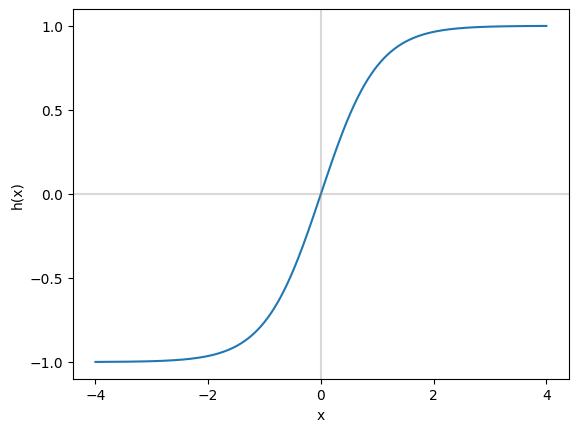

In [ ]:
x = np.linspace(-4, 4, 1_000)
y = np.tanh(x)

plot_h(x, y, l = -4, r = 4, s = 2)

Similar to the sigmoid function, it is continuous and monotonically increasing. Its range is $(-1, 1)$.

Its derivative is given by:
$$h'(x)=1-h(x)^2$$

## ReLU Function
The rectified linear unit (ReLU) function is given by:
$$h(x)=\begin{cases}
0 && x\leq 0\\
x && x>0
\end{cases}$$

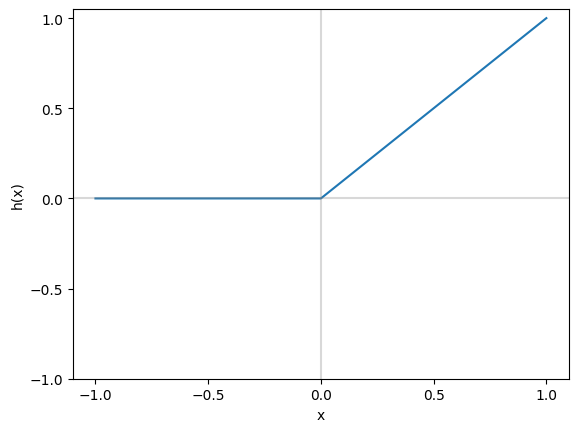

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-1, 1, 1_000)
y = relu(x)

plot_h(x, y)

While it may seem like it is discontinuous at $x=0$, we can simply take the derivative of each case, such that:
$$h'(x)=\begin{cases}
0 && x\leq 0\\
1 && x>0
\end{cases}$$

The astute may correctly observe that the derivative of $0$ for $x\leq0$ is problematic. A neuron with a negative preactivation that is determined by a ReLU activation are called "dead" ReLU units because it will always output the same value henceforth.

## Derivatives of Activation Functions

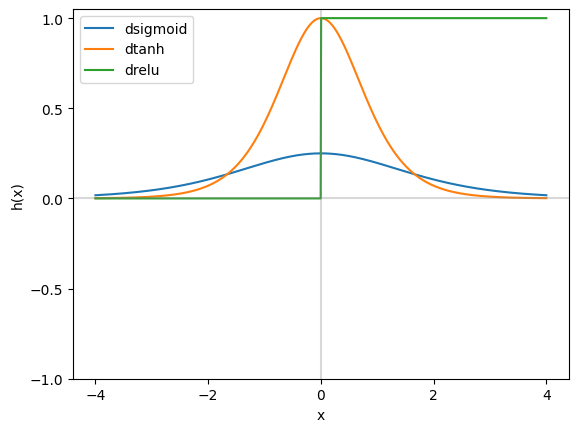

In [ ]:
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def dtanh(x):
    return 1 - np.tanh(x)**2

drelu = vstep

x = np.linspace(-4, 4, 1_000)
y_ds = dsigmoid(x)
y_dt = dtanh(x)
y_dr = drelu(x)

plt.plot(x, y_ds, label = 'dsigmoid')
plt.plot(x, y_dt, label = 'dtanh')
plt.plot(x, y_dr, label = 'drelu')

plt.xticks(np.arange(-4, 4 + 2, 2))
plt.yticks(np.arange(-1, 1 + 0.5, 0.5))

plt.axhline(0, color = 'gray', alpha = 0.3)
plt.axvline(0, color = 'gray', alpha = 0.3)

plt.xlabel('x')
plt.ylabel('h(x)')

plt.legend()

plt.show()

The sigmoid and tanh functions become saturated for large $|x|$, causing their derivatives at large $|x|$ to diminish. On the other hand, the derivative of the ReLU function is always large for $x>0$, resulting in an accelerated training.

# Multi-Label Classification
With what we've seen so far, we can only perform binary classification. Each activation function we've seen so far outputs just a single value.

Suppose we have a classification problem with $K$ categories. Our network will have an output layer of $K$ neurons, where each neuron represents a category. Then, the categories are $k=0,\ldots,k=K-1$ and the ground-truth labels are $y\in\{0,\ldots,K-1\}$.

Each category is represented as a one-hot vector, a $1\times K$ vector where the $k$-th element is $1$ and the rest are zeroes. Therefore, the output layer must also be a $1\times K$ one-hot vector. The preactivations of the output layer are called the logits. To compute the activation distribution from the preactivations, we must use the softmax function.

[[2]](#2)

## Softmax Activation Function
The softmax function converts a vector of $K$ real numbers into a probability distribution of $K$ possible outcomes.

The $k$th element of the activation is given by:
$$
a_k=\frac{e^{z_k}}{\sum_{k'=0}^Ke^{z_{k'}}}
$$

The exponent introduces nonlinearity and is used to amplify the output probability of relatively larger input components.

To prevent overflow, we can subtract the maximum component of the preactivation value from all components of the preactivation. Thus:
$$
a_k'=\frac{e^{z_k-z_m}}{\sum_{k'=0}^Ke^{z_{k'}-z_m}}
$$

Note that a hardmax function, one that outputs a one-hot vector indicating the greatest value of its input, is not differentiable, while softmax is.

[[2]](#2)

## Softmax Derivative
Using the quotient rule and some summation properties, we get:
$$\frac{da_k}{dz_j}=1\{k==j\}a_k-a_ka_j$$, where $1\{k==j\}$ is an indicator function which is $1$ when the condition is true and $0$ otherwise.

[[2]](#2)

# Error and Loss Functions
The error of a prediction problem is the deviation of a prediction from an observation, given by $\varepsilon_i=y_i-\hat{y}_i$.

The loss of a prediction problem is some function that quantifies the negative consequence of a prediction.


## L2 Loss
The L2 loss is the square of the L2 norm of the error (also the sum of the squared errors), given by:
$$\text{L}^2(\varepsilon)=\sum_i^N\varepsilon_i^2$$


## Mean Square Error
The Mean Square Error (MSE) is the mean of the squared errors, or the L2 loss divided by the number of records. It is given by:
$$
\text{MSE}(\varepsilon)=\frac{1}{n}\sum_i^N\varepsilon_i^2
$$

Note that the MSE measures a **loss**, despite having error in its name.


## Cross-Entropy Loss
The cross-entropy loss is the cross-entropy between the observations and the predictions. CEL is used for multi-label classification. It is given by:
$$
\text{CEL}(P,Q)=-\sum_{k=0}^KP(k)\log{Q(k)}
$$, where $P,Q$ are the observed and predicted probabilities of the $k$-th label being true.

Typically, $P$ is either $0$ or $1$ for a given record. Thus, our cross-entropy loss can also be written as:
$$
\text{CEL}(y,\hat{y})=-\sum_{k=0}^K\{y==k\}\log{\hat{y}}
$$

# Gradient Descent and Backpropagation

## The Problem
A neural network learning is equivalent to reducing the loss of some loss function. Thus, the problem is simply an optimization problem, given by:
$$
\min_{W_i,\mathbf{b_i}}L(W_i,\mathbf{b_i})
$$, where:
- $W_i$ is the $i$-th weight matrix
- $\mathbf{b}_i$ is the $i$-th bias vector
- $L(W_i,\mathbf{b_i})$ is the loss of the network determined by the parameters

Unfortunately, we generally cannot compute $W$ and $\mathbf{b}$ directly, either analytically or numerically, due to the large number of parameters a neural network may have. [[3]](#3)



## Gradient Descent
While we cannot directly compute $W$ and $\mathbf{b}$, we can first make a guess, then "descend" in the loss space by "moving" in the direction opposite to the gradient at that point. Hence, the name gradient descent.

As a refresher, the gradient of a function is the direction and rate of fastest increase.

The process can be visualized as shown below.
<div>
<img src="https://mriquestions.com/uploads/3/4/5/7/34572113/steepest-descent-loss-funciton_orig.png" width="500"/>
</div>

Our initial guess of $W$ and $\mathbf{b}$ may start at a high loss (the red in the plot), then "descend", following the gradients, to the minimum.

## Backpropagation
Backpropagation is the process of updating the parameters using some multiple of the gradient of the loss function with respect to the parameters. This update looks something like:
$$
W_1\leftarrow W_1-\alpha\frac{dL}{dW_1},\quad\mathbf{b}_1\leftarrow\mathbf{b}_1-\alpha\frac{dL}{d\mathbf{b}_1}
$$, and so on. $\alpha$ is often used to denote the **learning rate** of training.

The effect of learning rates are visualized below.

<div>
<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width="700"/>
<img src="https://cs231n.github.io/assets/nn3/learningrates.jpeg" width="250"/>
</div>

Backpropagation is named as such because the gradient of earlier parameters depends on the gradient of later parameters (i.e. $\frac{dL}{dW_2}$ is used in the calculation of $\frac{dL}{dW_1}$) because of the usage of the chain rule.

Fortunately, we do not need to know how to estimate these gradients by hand. Many deep learning frameworks include autograd, a reverse automatic differentiation system.

## Strategies
There are three primary strategies implemented when performing gradient descent. They differ in performance and accuracy.

<div>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*bKSddSmLDaYszWllvQ3Z6A.png" width="500"/>
</div>

Note that an epoch refers to a forward/back-propagation through the entire training dataset.

### Batch Gradient Descent
In batch gradient descent, each forward/back-propagation iteration is made on the entire dataset.

\+ Of the three strategies, batch gradient descent will update the parameters with the best estimate of the gradient.

\- This strategy requires the most memory and time per iteration. Furthermore, it may be impossible for large datasets.

### Mini-Batch Gradient Descent
In mini-batch gradient descent, each forward/back-propagation is made on a mini-batch of the entire dataset. If the data is split into $k$ mini-batches, each mini-batch will have $\frac{m}{k}$ samples. Once $k$ iterations are complete, one epoch will have been completed.

Its pros and cons are between that of batch and stochastic gradient descent.

This strategy is often used in deep learning.

### Stochastic Gradient Descent
In stochastic gradient descent, each forward/back-propagation is made on a single sample of the dataset. Thus, $m$ iterations are required to complete one epoch.

\+ Requires the least memory and time per iteration.

\- Very noisy estimate of the gradient. Hence "stochastic" in the name.

# Normalization
There are a number of practical reasons to normalize the input and output data. Normalizing data can make training faster, reduce the chances of getting local minima, and makes other techniques more convenient.

Differing scales of inputs and outputs would cause a variable with large variance to dominate the other variables.

## Standardization
Standardization centers and scales the data to unit variance. It is given by:
$$x'=\frac{{x}-\mu_{x}}{\sigma_{x}}$$, where $x$ is some vector. Note that scalar operations are applied element-wise.
The resulting mean and variance is $\mu_{x'}=0,\sigma_{x'}=1$.

This method of standardization assumes that the data is normally distributed.

## Minmax Scaling
Minmax scaling proportionally transforms a vector such that every value is in $[0,1]$. It is given by:
$$x'=\frac{x-x_{\text{min}}}{x_{\text{max}}-x_{\text{min}}}$$

# Data Splitting
We need data in order to train our model. This is our training data. We need separate data to test the robustness of our model to unseen data and prevent overfitting. This is our testing data. Furthermore, we need another set of data that we can monitor while tuning hyperparameters. This is our validation data.

Data is often separated into training and testing sets at an $80:20$ rate. Then, if one can afford, the training data is separated into training and validation sets at an $80:20$ rate.

## Why?
To convey the importance of these three disjoint sets, I will draw analogy to a teacher helping a student prepare for some math exam.

We, in the way that we design, train, and test models, are the teacher. The student, whom we, the teacher, help prepare for the exam, is the model.

The teacher provides the student with relevant study materials (e.g. textbook, past homeworks, past quizzes). These study materials are like the training data. The teacher also provides the student with sample exams so that they can assess the student's progress. These sample exams are like the validation data. Finally, the student and their understanding will be tested on the actual exam. The actual exam represents the testing data.

Studying ideally prepares the student with relevant knowledge and skills. However, there is no guarantee of deep understanding. Perhaps the student performs rote repetitions of certain questions, without deeply understanding the concepts of the problems and the techniques used to solve them. Perhaps the student memorizes theorems without understanding them.

Taking practice exams helps the teacher understand the student's preparedness for the actual exam with respect to the time they have spent studying. The teacher may change the student's study strategies based on their practice exam scores. However, the teacher should administer sample exams sparingly, as taking practice exams should not be depended on as a way to learn the material. It should only be a way to monitor progress and tune study strategies.

Finally, after all this preparation, the teacher will assess the student's understanding of the material with the actual exam. From the student's score on the exam, the teacher can reflect on the entire process. The study materials, the sample exams, the study strategies, etc.

## $k$-Fold Cross-Validation
Unlike setting aside a chunk, or none at all, of training data for validation, $k$-fold cross-validation varies the validation data taken from the training data. The number of different validation sets is determined by said $k$. The proportion of the training data to be used as validation data is given by $1/k$.

Thus, rather than a set $80:20$ split of training data into training and validation data, the split is given by $\frac{k-1}{k}:\frac{1}{k}$.

Cross-validation lowers the likelihood of overfitting hyperparameters to the validation set.

However, cross-validation is expensive and one may not have the time or resources to train multiple models.

### Example: 5-Fold Cross-Validation
<div>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500"/>
</div>

In 5-fold cross-validation, 5 training-validation splits are made and validation scores are taken from training a model with each differing training set but the same hyperparameters.

# Initialization
Initialization refers to the initial guess at the parameters.

An intuition will be provided for Xavier initialization.

## Xavier (Normal) Initialization
If the input and output are of zero mean and unit variance, we wish the prediction to also be of zero mean and unit variance. If we have $n$ layers of $w$ and $x$ that are multiplied, then the variance of the final activation would be $n*\sigma_w^2$. Thus, if we wish our prediction to have a unit variance, then $\sigma_w^2=\frac{1}{n}\rightarrow\sigma_w=\frac{1}{\sqrt{n}}. $Thus, we have:
$$W\sim\mathcal{N}(0,\frac{1}{n_\text{in}})$$, for $\mathcal{N}(\mu,\sigma^2)$.

Xavier initialization is often used for tanh activation functions.

[[5]](#5)

## Bengio Initialization
Considering both forward and backward propagation, we may wish for a variance of $\frac{2}{n_{\text{out}}+n_{\text{in}}}$. Thus, we have:
$$
W\sim\mathcal{N}(0,\frac{2}{n_{\text{out}}+n_{\text{in}}})
$$

[[7]](#7)

## Kaiming He Initialization
Kaiming He and his colleagues argued that Xaiver initialization does not work well for ReLU networks. Rather, they propose that a variance of $\frac{2}{n_\text{in}}$ is ideal. Thus:
$$
W\sim\mathcal{N}(0,\frac{2}{n_\text{in}})
$$

[[6]](#6)

# Regularization
Regularization is a set of techniques to prevent overfitting by adding information in neural networks.

## L2 Regularization
Suppose we change our objective function, $J(W)$, such that it includes the Frobenius norm of the weight matrices:
$$
J(W)=\text{CEL}(Y, \hat{Y})+\lambda\sum_{l=1}^L||W^{[l]}||_F^2
$$
Here, the cost will increase as the loss increases, but also as the complexity of the parameters increase. For $\lambda\rightarrow0$, our parameters are unconstrained and may overfit. For $\lambda\rightarrow\infty$, our parameters are zeroed and would underfit.

The gradient of this objective function is given by:
$$
\Delta J(W)=\Delta_WL+\lambda W
$$
Thus, the parameter update is given by:
$$
\displaylines{
W\leftarrow W-\alpha\Delta J(W)\\
W\leftarrow W-\alpha(\Delta_WL+\lambda W)\\
W\leftarrow (1-\alpha\lambda)W-\alpha\Delta_WL
}
$$
L2 regularization is also called weight decay because $W$ is reduced by some percent given by $\alpha\lambda$, regardless of the loss.


## Dropout Regularization
<div>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*wDGvx0z0-nEB8zQHykvwPw.png" width="500"/>
</div>

In dropout, we randomly drop the activations of some neurons of a layer. The neurons dropped are resampled for each training iteration. No neurons are dropped during testing.

The neurons dropped during training are decided by sampling from a Bernoulli distribution with probability, $p$. $p=0.5$ is a common starting point.


### Why?
Dropout can help to prevent overfitting and efficiently generate ensemble networks (i.e. a network whose evaluation is the aggregation of multiple individual networks).

The idea of dropout is that hidden units cannot co-adapt, which decreases the complexity of the network. This forced independence also means that the weights of a node's inputs are spread across all input nodes, similar to L2 regularization.

[[1]](#1), [[2]](#2), [[11]](#11)

### Scaling
With no other changes, a problem arises during testing. All neurons see all inputs, whereas during training, they only saw $p*n_\text{in}$ inputs. Thus, they are seeing $\frac{1}{p}$ more inputs. To ensure a neuron's expected outputs during testing match the expected outputs during training, we can scale the outputs of neuron by $p$ during testing.

[[8]](#8)

### Inverted Dropout
Inverted dropout performs the aforementioned scaling during training, leaving evaluations untouched. Thus, a neuron's activations are scaled by $\frac{1}{p}$ during training.

It is always preferable to use inverted dropout because evaluation performance is critical.

[[2]](#2), [[8]](#8), [[11]](#11)

# Learning Rate Decay
It is usually helpful to anneal the learning rate over time. Knowing when to decay can be tricky: too slow and you'll be wasting epochs updating the parameters chaotically but too fast and the system will cool too soon, before it can find a minimum.

A number of learning rate schedulers are visualized below.

<div>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*qe6nYlH8zsmUdScyHMhRCQ.png" width="1000"/>
</div>

[[9]](#9)

## Step
With step decay, the learning rate is reduced by a constant factor every few epochs.

## Linear
With linear decay, the learning rate is linearly interpolated from $\alpha_0$ to $\alpha_n$ over $n$ epochs. Thus, the learning rate is incremented by $\frac{\alpha_n-\alpha_0}{n}$ every epoch.

## Exponential
With exponential decay, the learning rate is given by $\alpha_{t}=\alpha_0e^{-kt}$.

## Cosine Annealing
A cosine annealing learning rate scheduler decays the learning rate from its starting value to a minimum value, and repeats. The resetting of the learning rate acts as a simulated restart with good weights ("warm restart" vs "cold restart").

It is given by:
$$
\alpha_t=\alpha_\text{min}+\frac{1}{2}(n_\text{max}-n_\text{min})(1+\cos\frac{T_\text{cur}}{T_{i}})
$$, where $T_\text{cur}$ is how many epochs have passed since the last restart and $T_i$ is how many epochs pass in one cycle.

Each cycle can be saved as a snapshot and a model ensemble can be created from the many snapshots.

## What To Use
Step decay is slightly preferable, as its hyperparameters are more interpretable than the hyperparameter, $k$, of exponential decay.

If you can afford the additional computation, err on the side of slower decay.

# Updating Parameters
Parameters are typically updated simply as:
$$\theta_{t+1}=\theta_t-\alpha\Delta J(\theta_t)$$, where $\Delta J(\theta_t)$ is the gradient of the objective function at step $t$.

However, several methods have been developed to improve the speed of convergence.

## Momentum
Momentum has a clear physical analogy. The optimization process is akin to the process of simulating the parameters (as a particle) rolling down a landscape. If the loss of the parameters is the potential energy of the particle, then the gradient gives the force felt by the particle, which is proportional to the acceleration. This acceleration determines the particle's next velocity, which determines the particles next position.

Thus, by physics, the gradient only directly affects the velocity, which, in turn, affects the position.

Updating weights with momentum is given by:
$$\displaylines{
V_{t+1}=\beta V_t+(1-\beta)\Delta J(\theta_t)\\
\theta_{t+1}=\theta_t-\alpha V_t
}$$

Above, the velocity is represented as $V$. $\beta$ determines the amount that the current gradient affects $V$. Then, $V$ is used to update the parameters.

Note that, before, we were taking the gradient to be the present velocity (i.e. $\beta=0$). Under momentum, we take the gradient to be the present acceleration. The effect of the velocity and acceleration are controlled by parameters, $\alpha$ and $\beta$.

Also note momentum's relations to exponentially weighted moving averages, where $\beta$ may represent some smoothing factor.

[[1]](#1), [[2]](#2), [[9]](#9)

## Nesterov's Accelerated Gradient (NAG)
Nesterov's accelerated gradient (also known as Nesterov momentum) is a slightly different version of momentum which has stronger theoretical guarantees for convergence in convex functions.

The idea behind NAG is that we should "look ahead" and get an estimate of the gradient at $(\theta_t-\beta V_t)$, the approximate value of the parameter in the next step.

Updating weights with NAG is given by:
$$\displaylines{
V_{t+1}=\beta V_t+(1-\beta)\Delta J(\theta_t-\beta V_t)\\
\theta_{t+1}=\theta_t-\alpha V_t
}$$

The difference is visualized below.

<div>
<img src="https://cs231n.github.io/assets/nn3/nesterov.jpeg" width="800"/>
</div>
Instead of evaluating gradient at the current position (red circle), we know that our momentum is about to carry us to the tip of the green arrow. With Nesterov momentum we therefore instead evaluate the gradient at this "looked-ahead" position.

[[2]](#2), [[9]](#9)

## Adaptive Gradient (Adagrad)
The adaptive gradient algorithm (Adagrad) uses the knowledge of the geometry of the data learned from earlier iterations. Simply, it makes the learning rate of certain parameters to be inversely proportional to how much they've already changed.

Adagrad is expressed as:
$$\displaylines{
G_t=\sum_{\tau=1}^t\Delta J(\theta_\tau)^2\\
\theta_{t+1}=\theta_t-\frac{\alpha}{\sqrt{G_t+\epsilon}}\Delta J(\theta_t)
}$$, where $G_t$ measures the total squared gradients from time $1$ to time $t$.

The $\epsilon$ term in the denominator ensures that no divisions by zero occur (usually set somewhere between from 1e-4 to 1e-8).

The square root operation turns out to be very important. Because we square the gradients when computing $G_t$, we take the square root to simply get the unsigned accumulated magnitude of the gradients.

A downside of Adagrad is that the monotonic learning rate is often too aggressive and stops too early.

[[9]](#9)

## Root Mean Square Propagation (RMSprop)
Root Mean Square Propagation (RMSprop) is an extension of Adagrad that reduces its aggressive, monotonically decreasing learning rate by only considering a part of the past squared gradients, rather than the accumulation of all past squared gradients.

Instead of inefficiently storing $w$ past gradients and taking their accumulated value, RMSprop uses a moved average of the squared gradients.

RMSprop is given by:
$$\displaylines{
G_t=\beta G_{t-1}+(1-\beta)\Delta J(\theta_t)^2\\
\theta_{t+1}=\theta_t-\frac{\alpha}{\sqrt{G_t+\epsilon}}\Delta J(\theta_t)
}$$

Interestingly, RMSprop is unpublished and was proposed by Geoff Hinton in slide 29 of lecture 6 of his Coursera class.

AdaDelta is a similar adaptive learning rate method that was developed independently from the same idea. However, it goes one step further and eliminates the learning rate parameter, $\alpha$.

[[9]](#9), [[10]](#10)

## Adaptive Momentum (Adam)
Adaptive Momentum (Adam) is a technique that combines momentum and RMSprop. It is given by:
$$\displaylines{
V_{t+1}=\beta_1V_t+(1-\beta_1)\Delta J(\theta_t)\\
G_t=\beta_2G_{t-1}+(1-\beta_2)\Delta J(\theta_t)^2\\
\theta_{t+1}=\theta_t-\frac{\alpha}{\sqrt{G_t+\epsilon}}V_{t+1}
}$$

## What Optimizer Do I Use?
Many papers use vanilla SGD and a simple learning rate annealing schedule. SGD usually finds a minimum but may take significantly longer, may get stuck in saddle points, and relies on robust initialization and an annealing learning rate scheduler.

On the other hand, if you care about fast convergence, you should choose an adaptive learning rate method, of which Adam is often the best choice.

The different optimization techniques are visualized below. Unfortunately, Adam is not included.

<div>
<img src="https://i.imgur.com/2dKCQHh.gif" width="500"/>
<img src="https://i.imgur.com/s25RsOr.gif" width="500"/>
</div>

[Courtesy of Alec Radford](http://imgur.com/a/Hqolp)



[[10]](#10)

# Batch (Layer) Normalization
Normalizing the input and output data ensures that the model learns from and attempts to predict normalized, balanced data. However, the inputs and outputs of hidden layers are not regulated at all.

Batch normalization (batchnorm) performs normalization of hidden layers. Given $B$, the number of samples in a batch and $z^{(i)}$, the pre-activations at a layer, we have:
$$\displaylines{
\mu_B\leftarrow\frac{1}{B}\sum_{i=1}^Bz^{(i)}
\\
\sigma_B^2\leftarrow\frac{1}{B}\sum_{i=1}^B(z^{(i)}-\mu_B)^2
\\
z_\text{norm}\leftarrow\frac{z^{(i)}-\mu_B}{\sqrt{\sigma^2+\epsilon}}
\\
\tilde{z}\leftarrow\gamma z_\text{norm}+\beta
}$$, where $\gamma,\beta$ are parameters that are also updated during gradient descent, with:
$$
\gamma\leftarrow\gamma-\alpha\frac{dL}{d\gamma},\beta\leftarrow\beta-\alpha\frac{dL}{d\beta}
$$

Then, these normalized and adjusted pre-activations are fed into an activation function to compute the activations at that layer.

During test time, we use a running exponentially weighted average of mean $\overline{\mu}$ and variance $\overline{\sigma^2}$ to normalize the layer's preactivations. Thus, during training, we need to keep track of the EWA mean and variance for each layer:
$$\displaylines{
\overline{\mu}=\beta_1\overline{\mu}+(1-\beta_1)\mu_B\\
\overline{\sigma^2}=\beta_2\overline{\sigma^2}+(1-\beta_2)\sigma_B^2
}$$

Then, we have:
$$\displaylines{
z_\text{norm}^t\leftarrow\frac{z^{t}-\overline{\mu}}{\sqrt{\overline{\sigma^2}+\epsilon}}
\\
\tilde{z}^2\leftarrow\gamma z_\text{norm}^t+\beta
}$$

One might think to use the input batches to compute $\mu_B$ and $\sigma_B^2$, then normalize them and scale them to the learned $\gamma$ and $\beta$. However, if there is only one sample in the batch, the batch will be zeroed and the layer's preactivation will always be $\beta$, no matter the input.

[[2]](#2), [[8]](#8), [[11]](#11)

## Why?
Networks using batchnorm generally have stronger performance. A network using batchnorm can use a wider range of hyperparameters because it is more stable to train (e.g. robust to larger learning rates, bad initialization, etc.).

The working mechanism of batchnorm is not yet fully understood.

# Hyperparameter Tuning
As we've seen, there are many hyperparameters to be tuned. These include, but are not limited to, the learning rate, the learning rate scheduler, regularization used, batch sizes, parameter update method, etc.

If we wished to search for the optimal combination of two hyperparameters, there are two obvious options: grid search and random search.


<div>
<img src="https://cs231n.github.io/assets/nn3/gridsearchbad.jpeg" width="500"/>
</div>

It is argued that random search is more efficient than grid search.

Make sure to search for hyperparameters on an appropriate scale. One should use standard uniform sampling for $p_\text{keep}\in[0,1]$ for dropout because the range of values is within one order of magnitude. Thus, $p\sim U(0,1). $However, logarithmic sampling should be used for $\alpha$, the learning rate because it is typically varied by factors of 10 (e.g. $\alpha\in[0.001,1]$). Thus, $\alpha\sim10^{U(0.001,1)}$.

A popular strategy is to use a random coarse search, then a grid fine search.

[[9]](#9), [[11]](#11)

## Implementation
Hyperparameter search can take many days/weeks for large networks. One design is to have a worker that continously samples hyperparameters, recording performance and saving model checkpoints for each point checked. Another program, the master, launches or kills workers across a compute cluster and may inspect the checkpoints, model performance, etc.

[[9]](#9)

# References
1. T. Lee, V. P. Singh, K. H. Cho. 2021. Deep Learning for Hydrometeorology and Environmental Science. Available: https://content.e-bookshelf.de/media/reading/L-15184113-784f071c38.pdf
2. H. Venkateswara. Introduction to Deep Learning. 2024.
3. D. B. Cerigo. On Why Gradient Descent is Needed. 2018. Available: https://github.com/DBCerigo/talks-presentations/blob/master/deep_learning_without_hype/On%20Why%20Gradient%20Descent%20Is%20Needed%20-%20Without%20The%20Hype.ipynb
4. A. Ng. Standard notations for Deep Learning. 2017. Available: https://cs230.stanford.edu/files/Notation.pdf
5. A. Ng. Xavier Initialization. 2022. Available: https://cs230.stanford.edu/section/4/
6. K. He, et. al. Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification. 2015. Available: https://arxiv.org/abs/1502.01852
7. X. Glorot, Y. Bengio. Understanding the difficulty of training deep feedforward neural networks. 2010. Available: https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
8. A. Karpathy, et. al. CS231n: Neural Networks 2. 2021. Available: https://cs231n.github.io/neural-networks-2
9. A. Karpathy, et. al. CS231n: Neural Networks 3. 2017. Available: https://cs231n.github.io/neural-networks-3
10. S. Ruder. An overview of gradient descent optimization algorithms. 2016. Available: https://www.ruder.io/optimizing-gradient-descent/#adadelta
11. F. Li, et. al. Lecture 7: Training Neural Networks. 2018. Available: https://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture06.pdf, https://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture07.pdf